# 1. Datos: Precipitaciones, Indicadores Económicos del Banco Central

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco_central = pd.read_csv("banco_central.csv")


# 2. Análisis de Datos. Creación de variables

## 2.1 Análisis Exploratorio datos

## Precipitaciones

In [3]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
precipitaciones.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [5]:
precipitaciones.isna().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

In [6]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


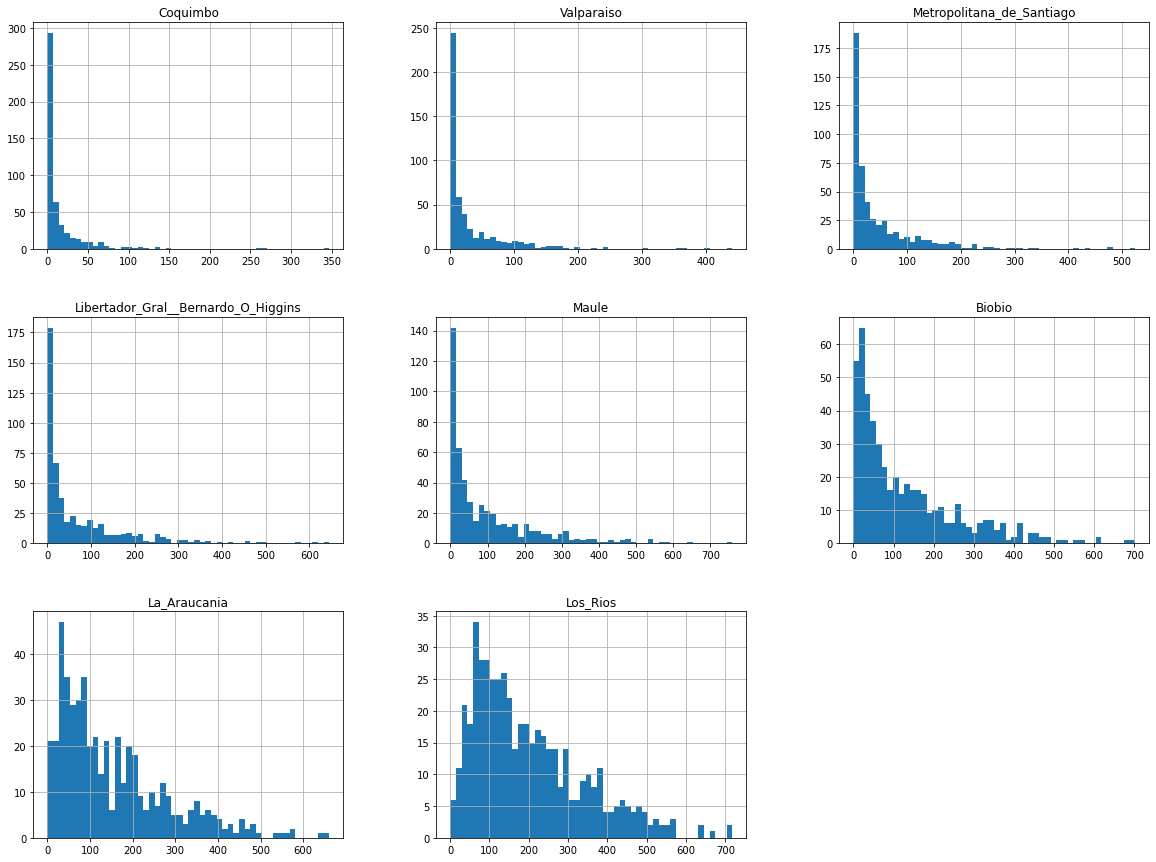

In [7]:
# histogramas

# respuesta 2.1
# las precipitaciones van aumentando en la medida que la región está mas al sur, siendo la región de los Ríos con mayor cantidad de mm por lluvia


precipitaciones.hist(bins=50, figsize=(20,15))
plt.show()


In [8]:
# correlations

corr_matrix = precipitaciones.corr()

# estudiemos, por ejemplo, la correlación de las precipitaciones con Santiago

corr_matrix['Metropolitana_de_Santiago'].sort_values(ascending=False)

Metropolitana_de_Santiago              1.000000
Libertador_Gral__Bernardo_O_Higgins    0.976389
Valparaiso                             0.967567
Maule                                  0.904947
Coquimbo                               0.813478
Biobio                                 0.804073
La_Araucania                           0.729807
Los_Rios                               0.677950
Name: Metropolitana_de_Santiago, dtype: float64

1. Es decir, las regiones mas cercanas están altamente correlacionadas con Santiago

In [9]:
precipitaciones.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

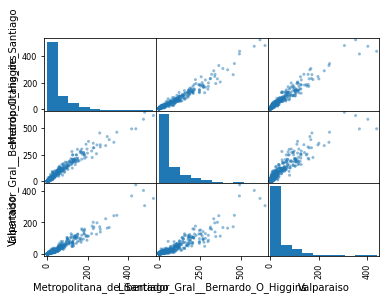

In [10]:
from pandas.plotting import scatter_matrix

zonas_centro = ["Metropolitana_de_Santiago", "Libertador_Gral__Bernardo_O_Higgins", "Valparaiso"]
scatter_matrix(precipitaciones[zonas_centro])
plt.show()

### Banco Central

In [11]:
banco_central.shape

(614, 85)

In [12]:
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [13]:
banco_central.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [14]:
banco_central.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [15]:
banco_central.isna().sum()

Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64

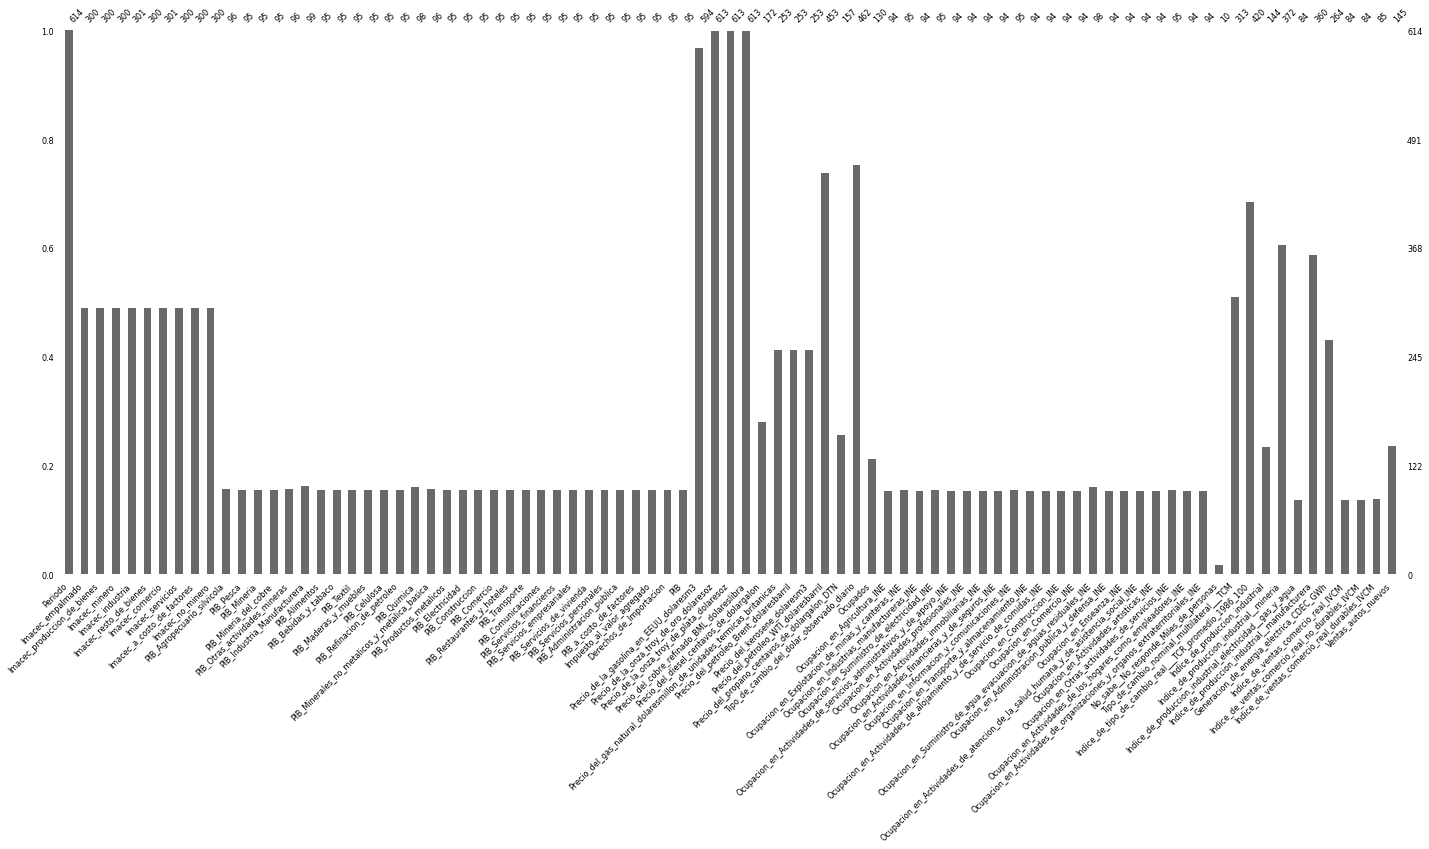

In [16]:
import missingno as msno

# 2.1: llama la atención la cantidad de datos faltantes en indicadores económicos tales como imacec, PIB, indicadores de ocupación, entre otros

msno.bar(banco_central, labels=True, fontsize=8)

## 2.2 Eliminar valores duplicados y valores incorrectos

In [17]:
# remove duplicates

def remove_duplicates(df):
    df = df.drop_duplicates(keep='last')
    return df

precipitaciones = remove_duplicates(precipitaciones)
banco_central = remove_duplicates(banco_central)

print(len(precipitaciones[precipitaciones.duplicated()]))
print(len(banco_central[banco_central.duplicated()]))

0
0


In [18]:
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01 00:00:00 UTC,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01 00:00:00 UTC,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01 00:00:00 UTC,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01 00:00:00 UTC,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


In [19]:
def transform_object_columns_into_numeric(df, columns_names):
    """parses object columns into float columns"""
    df_time_series = df.copy()

    for col_name in columns_names:
        if col_name == 'Periodo': continue
        col_time_series = df_time_series[[col_name]].dropna(how='any')
        col_time_series[col_name] = col_time_series[col_name].str.replace(".", "")
        col_time_series = pd.to_numeric(col_time_series[col_name], errors="coerce").dropna(how='any').astype(float)
        
        # keep only positive index
        col_time_series = col_time_series.loc[col_time_series>0].copy()
        # replace the values of the column in the corresponding index and column
        df_time_series.loc[col_time_series.index, col_name] = col_time_series.values

        df_time_series[col_name] = pd.to_numeric(df_time_series[col_name], errors="coerce")


    return df_time_series

In [20]:
object_cols_banco_central = banco_central.select_dtypes(object)
object_columns = list(object_cols_banco_central.columns)


In [21]:
object_columns = list(object_cols_banco_central.columns)
df2 = transform_object_columns_into_numeric(banco_central, object_columns)

In [22]:
df2.isna().sum().sum()

37116

### 2.2 Remover outliers

1. Primero se probó un esquema con z-score, pero no se obtuvieron muchos resultados. Principalmente porque, por ejemplo, para la limpieza de los datos del imacec se estaban solo quitando los puntos y transformanco a float, pero consultando con un ingeniero comercial se entendió el rango normal del imacec, y se corrigió la limpieza

2. La segunda limpieza es precisamente la correcta forma de limpiar las columnas de imacec

In [24]:
from numpy import nan
from scipy import stats

def remover_outliers_zscore(df, name_col, tol_zscore=2.6):
    df_data = df.copy()
    df_data["zscore_Con"] = stats.zscore(df_data[name_col], nan_policy='omit')
    outlier_data = df_data.loc[np.absolute(df_data["zscore_Con"]) > tol_zscore].copy()
    df_data.loc[outlier_data.index, name_col] = nan

    del df_data['zscore_Con']

    return df_data

def remove_outliers_df(df, remove_columns):
    df_remove = df.copy()

    df_pre_columns = set(df_remove.columns)

    keep_columns = list(df_pre_columns.difference(remove_columns))

    for col_name in keep_columns:
        df_remove = remover_outliers_zscore(df_remove, col_name)

    return df_remove

In [25]:
remove_columns = ['Periodo', 'year', 'month', 'trimestre']
df2_columns = set(df2.columns)

keep_columns = list(df2_columns.difference(remove_columns))

df3 = df2.copy()

for col_name in keep_columns:
    df3 = remover_outliers_zscore(df3, col_name)

print(df2.isna().sum())
print(df3.isna().sum())


Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   314
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64
Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   314
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh

In [26]:
print(df2.isna().sum().sum())
print(df3.isna().sum().sum())

37116
37457


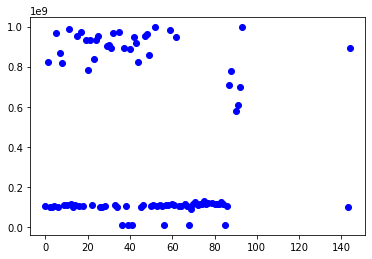

In [27]:
name_col_test = "PIB_Refinacion_de_petroleo"
plt.scatter(df2.index, df2[name_col_test], color='blue')

### Fix Imacec data

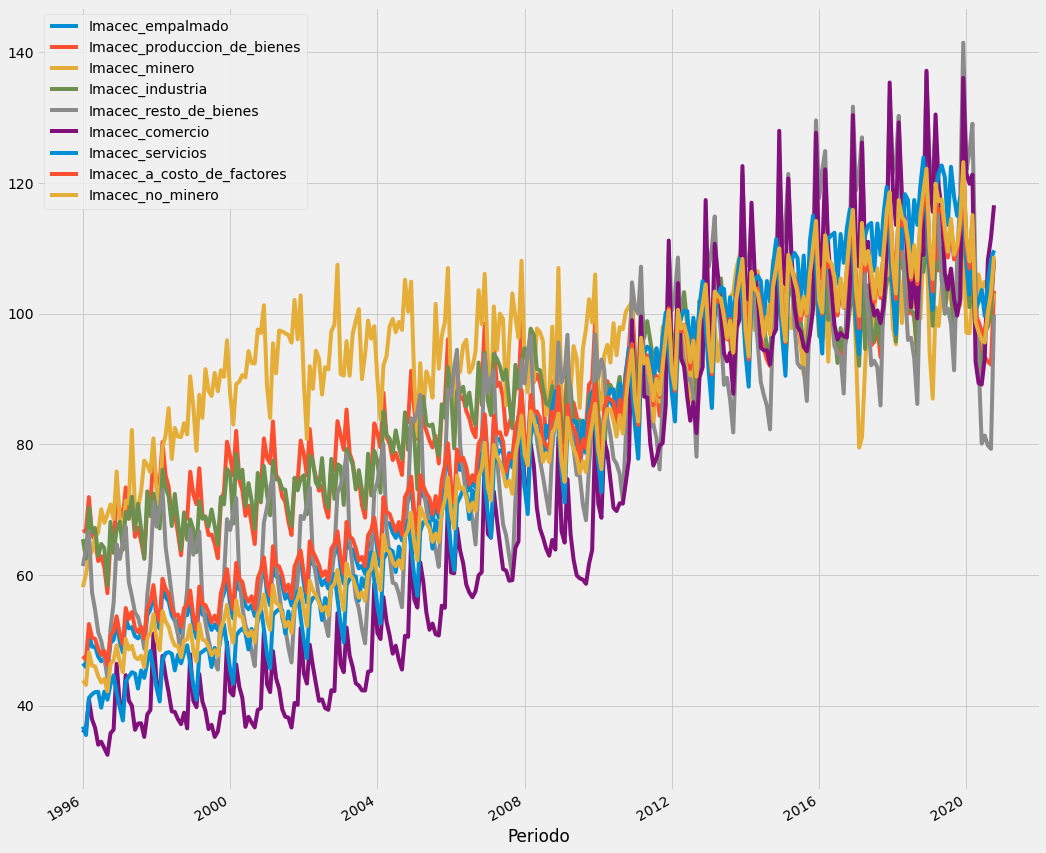

In [109]:
def parse_dates(df, field_name):
    """converts date field into datetime object"""
    # parse strings and conversions to datetime type
    df[field_name] = pd.to_datetime(df[field_name], errors='coerce').astype('datetime64[ns]')

    return df


def get_number(x):
    if type(x) != str: return x
    final_position = x.find('.') 
    if final_position!=-1:
        return x[:final_position + 2]
    return x

def fix_range(imacec_index, tol_imacec_upper=200, tol_imacec_lower=20):
    if imacec_index<tol_imacec_upper and imacec_index>tol_imacec_lower:
        return imacec_index
    
    # upper treatment
    while imacec_index>= tol_imacec_upper:
        imacec_index = imacec_index/10
    # lower treatment
    while imacec_index< tol_imacec_lower:
        imacec_index = imacec_index*10
    
    return imacec_index

def get_imacec(df, col_name):
    df_imacec = df.copy()
    imacec_column = df_imacec[col_name].apply(lambda word: get_number(word))

    df_imacec[col_name] = pd.to_numeric(imacec_column, errors='coerce')

    df_imacec[col_name] = df_imacec[col_name].apply(lambda imc: fix_range(imc))

    return df_imacec

def clean_imacec(df_banco):

    imacec_columns = [imacec_word for imacec_word in df_banco.columns if "Imacec" in imacec_word]

    banco_central_fixed_imc = df_banco.copy()
    banco_central_fixed_imc['Periodo'] = parse_dates(banco_central_fixed_imc, 'Periodo')
    banco_central_fixed_imc.sort_values(['Periodo'], inplace=True)
    banco_central_fixed_imc.index = banco_central_fixed_imc['Periodo']

    for imc_name in imacec_columns:
        banco_central_fixed_imc = get_imacec(banco_central_fixed_imc, imc_name)
    

    return banco_central_fixed_imc

# script

banco_central_imc = clean_imacec(banco_central)
imacec_columns = [imacec_word for imacec_word in banco_central.columns if "Imacec" in imacec_word]

banco_central_imc[imacec_columns].plot(figsize=(16, 16))

plt.show()

# 3. Visualización

In [30]:
def filter_df_by_dates(df, initial_date, final_date):
    """filters data in df in between the dates initial_date and final_date"""
    condition_dates = (df.index>= initial_date) & (df.index<= final_date)
    df_filtered_by_date = df.loc[condition_dates]
    assert len(df_filtered_by_date)!=0, f"no data in between {initial_date} and {final_date}"

    return df_filtered_by_date

def parse_dates(df, field_name):
    """converts date field into datetime object"""
    # parse strings and conversions to datetime type
    df[field_name] = pd.to_datetime(df[field_name], errors='coerce').astype('datetime64[ns]')

    return df

def swap_dates(initial_date, final_date):
    """swap dates if neccessary"""
    initial_date, final_date = pd.to_datetime(initial_date), pd.to_datetime(final_date)
    if initial_date> final_date:
        initial_date, final_date = final_date, initial_date  # swap dates in case of error
    return initial_date, final_date

def plot_precipitations(region_name, initial_date, final_date, df):
    """
    initial_date: str
                date with the format 'YYYY-MM-DD'
    initial_date: str
                date with the format 'YYYY-MM-DD'
    region_name: str
           name of the region
    df: pandas.DataFrame
        dataframe with 'date' among its columns
    """
    precipitaciones = df.copy()

    initial_date, final_date = swap_dates(initial_date, final_date)
    precipitaciones = parse_dates(precipitaciones, 'date')

    # sort values and set date as index
    precipitaciones.sort_values(['date'], inplace=True)
    precipitaciones = precipitaciones.set_index('date')

    # conditions to filter the data
    condition_region = (region_name in list(precipitaciones.columns))

    assert condition_region, f"region {region_name} not found. try a region in {df.drop(['date'], axis=1).columns}"

    df_filtered_by_date = filter_df_by_dates(precipitaciones, initial_date, final_date)
    
    plt.style.use('fivethirtyeight')
    ax = df_filtered_by_date[region_name].plot()
    ax.set_xlabel("Date")
    ax.set_ylabel("precipitacion level (mm)")
    ax.set_title(f"precipitations in {region_name} in between {initial_date.date()} and {final_date.date()}", fontsize=10)
    plt.show()


    # plt.scatter(x="date", y=region_name, data=df_filtered_by_date)

# 3.1

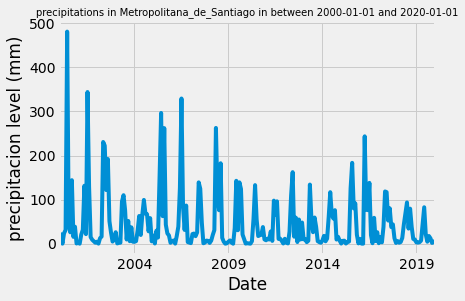

In [31]:
# Región Metropolitana entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

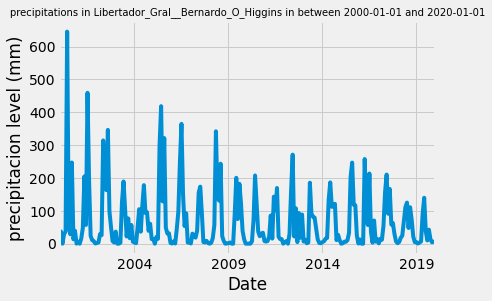

In [32]:
# L entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Libertador_Gral__Bernardo_O_Higgins"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

### Analysis of a year

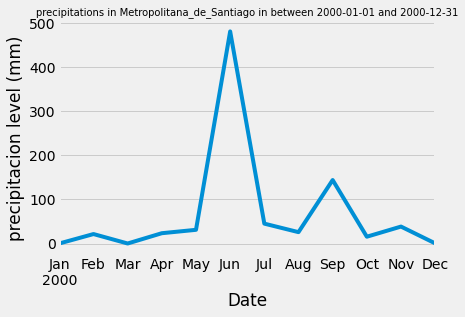

In [33]:
# 2020 in Region Metropolitana

initial_date = "2000-01-01"
final_date = "2000-12-31"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

### Análisis

1. se observan comportamientos parecidos en cuanto a precipitaciones, con la diferencia de que en Libertador Bernardo O'Higgins hay un mayor volumen en mm
2. además, se observa claramente que los mm de lluvia han ido disminuyendo año a año en una misma región. Por ejemplo, en el caso de la RM, el nivel de precipitaciones el 2019
es cerca de un quinto se lo que fue en 2000
3. Analizando un año para ver las precipitaciones en las temporadas, se ve que durante el mes de Mayo a Septiembre se conservan la mayor parte de mm que caen en un año, como es de esperar.

# 3.3

In [34]:
def plot_precipitations_by_months(df, years, region_name):
    """
    plots multiple time series of precipitations by months in a collection of years
    --------------------------------------------
    df : pandas.DataFrame
        dataframe containing the field 'date'
    years: list[int]
            list of years to be plotted from df
    region_name: str
                region to be plotted.
    """
    assert len(years)!=0, "no years were given"

    precipitations = df.copy()

    # parse strings and conversions to datetime type
    precipitations = parse_dates(precipitations, 'date')

    # sort values and set date as index
    precipitations.sort_values(['date'], inplace=True)
    precipitations['year'] = precipitations['date'].dt.year
    precipitations['month'] = precipitations['date'].dt.month

    # conditions to filter the data
    condition_region = (region_name in list(precipitaciones.columns))
    assert condition_region, f"region {region_name} not found. try a region in {df.drop(['date'], axis=1).columns}"

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(16,12))
    for year in years:
        df_year = precipitations.loc[precipitations.year == year].copy()
        if len(df_year)==0:
            print(f"no data for year {year}!")
            continue
        
        df_year = df_year.set_index('month')

        ax = df_year[region_name].plot(label=year)

    ax.set_xlabel("Months")
    ax.set_ylabel("precipitacion level (mm)")
    ax.set_title(f"precipitations through years in {region_name}", fontsize=15)

    plt.legend()
    plt.show()

# 3.4

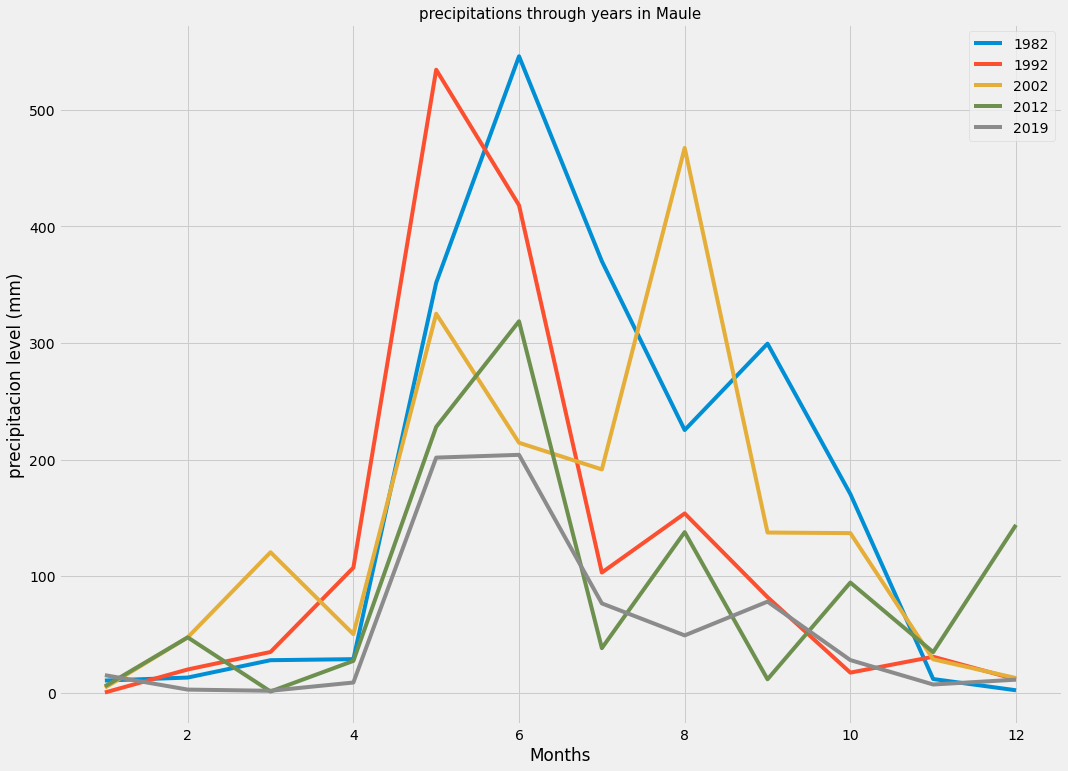

In [35]:
# Precipitations in Region del Maule in the years 1982, 1992, 2002, 2012 and 2019
region_name = "Maule"
years = [1982, 1992, 2002, 2012, 2019]

plot_precipitations_by_months(precipitaciones, years, region_name)

### Análisis

one clear conclusion is the disminution of the precipitaton level in the years 2012 and 2019 compared to previous years

# 3.5 Función para graficar dos series de tiempo de PIB para un rango de fechas determinado

In [52]:
PIB_columns = [pib_word for pib_word in banco_central.columns if "PIB" in pib_word]
PIB_columns.insert(0, 'Periodo')
PIB_columns.insert(1, 'year')
PIB_columns.insert(1, 'month')
PIB_columns.insert(1, 'trimester')

print(PIB_columns)

['Periodo', 'trimester', 'month', 'year', 'PIB_Agropecuario_silvicola', 'PIB_Pesca', 'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras', 'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco', 'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa', 'PIB_Refinacion_de_petroleo', 'PIB_Quimica', 'PIB_Minerales_no_metalicos_y_metalica_basica', 'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion', 'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte', 'PIB_Comunicaciones', 'PIB_Servicios_financieros', 'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda', 'PIB_Servicios_personales', 'PIB_Administracion_publica', 'PIB_a_costo_de_factores', 'PIB']


In [89]:
# create year, month and trimester variables

def generate_time_features(df):
    banco_df = df.copy()
    banco_df = parse_dates(banco_df, 'Periodo')

    banco_df['year'] = pd.to_numeric(banco_df['Periodo'].dt.year, errors='coerce', downcast='integer')
    banco_df['month'] = pd.to_numeric(banco_df['Periodo'].dt.month, errors='coerce', downcast='integer')
    banco_df['trimester'] = banco_df['Periodo'].dt.quarter

    return banco_df

df_banco_2 = banco_central.copy()
df_banco_2 = parse_dates(df_banco_2, 'Periodo')
df_banco_2 = generate_time_features(df_banco_2)

df_pib_banco = df_banco_2[PIB_columns].sort_values(['Periodo'])

df_pib_banco_trim = df_pib_banco.loc[(df_pib_banco.year==2020) & (df_pib_banco.trimester==1)]

df_pib_banco_trim

,Periodo,trimester,month,year,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
84,2020-01-01,1.0,1.0,2020.0,604.131.758,518.877.666,122.550.223,109.011.388,135.734.314,137.151.288,...,258.025.138,670.299.142,453.185.039,761.386.453,127.479.518,999.642.722,961.085.986,610.768.526,11580.1,126.718.108
85,2020-02-01,1.0,2.0,2020.0,659.799.944,625.113.646,122.433.606,110.257.742,122.610.017,128.997.988,...,259.507.321,639.463.296,404.918.994,763.429.291,11.853.218,979.474.111,858.720.441,61.031.327,112.447.945,122.919.079
86,2020-03-01,1.0,3.0,2020.0,582.139.056,78.232.001,12.990.343,117.943.417,120.862.576,1358.56,...,182.918.032,563.750.201,407.530.537,767.636.032,121.874.714,965.647.531,152.874.375,612.351.252,120.379.977,131.011.436


In [72]:
df_pib_banco_trim['PIB_Pesca'].iloc[0]

'707.214.659'

In [84]:
# PIB total en el primer trimestre del 2020
# 1
print(126718108 + 122919079 + 131011436)
#2
print(113580473 + 112873882+ 111326892)
#3
print(111070003 +116407225+ 118574799)

380648623
337781247
346052027


### Análisis
1. Analizando junto con datos del banco central, se conclye que las unidades de PIB están en cientos de millones de pesos.

In [90]:
from sklearn import preprocessing


def preprocess_pib_columns(df, pib_col_name, date_name):
    """gives a time series ready to be plotted"""
    df_time_series = df.copy()
    df_time_series = df_time_series[[pib_col_name]].dropna(how='any')
    df_time_series[pib_col_name] = df_time_series[pib_col_name].str.replace(".", "")
    df_time_series[pib_col_name] = pd.to_numeric(df_time_series[pib_col_name], errors="coerce").dropna(how='any').astype(int)
    df_time_series.dropna(how='any', inplace=True)
    # df_time_series = df_time_series.set_index(date_name)

    # # scale data
    # min_max_scaler = preprocessing.MinMaxScaler()
    # pib_scaled = min_max_scaler.fit_transform(df_time_series.values)

    # df_time_series = pd.DataFrame(pib_scaled, columns=df_time_series.columns)
    
    return df_time_series

def plot_PIB_time_series(df, time_series_name_1, time_series_name_2, initial_date, final_date):

    initial_date, final_date = swap_dates(initial_date, final_date)
    
    df_pib = df.copy()
    df_pib = parse_dates(df_pib, 'Periodo')
    df_pib.dropna(subset=["Periodo"], inplace=True)

    # sort values and set date as index
    df_pib.sort_values(['Periodo'], inplace=True)
    df_pib = df_pib.set_index('Periodo')

    df_filtered_by_date = filter_df_by_dates(df_pib, initial_date, final_date)
    
    names_time_series = [time_series_name_1, time_series_name_2]
    assert set(names_time_series).issubset(df_pib.columns)

    plt.figure(figsize=(16,16))
    for time_series in names_time_series:
        df_pib_to_plot = preprocess_pib_columns(df_filtered_by_date, time_series, "Periodo")  
        plt.style.use('fivethirtyeight')
        ax = df_pib_to_plot[time_series].plot(label = time_series)
    ax.set_xlabel("Date")
    ax.set_ylabel("PIB")
    ax.set_title(f"{names_time_series[0]} y {names_time_series[1]}")
    plt.legend()
    plt.show()


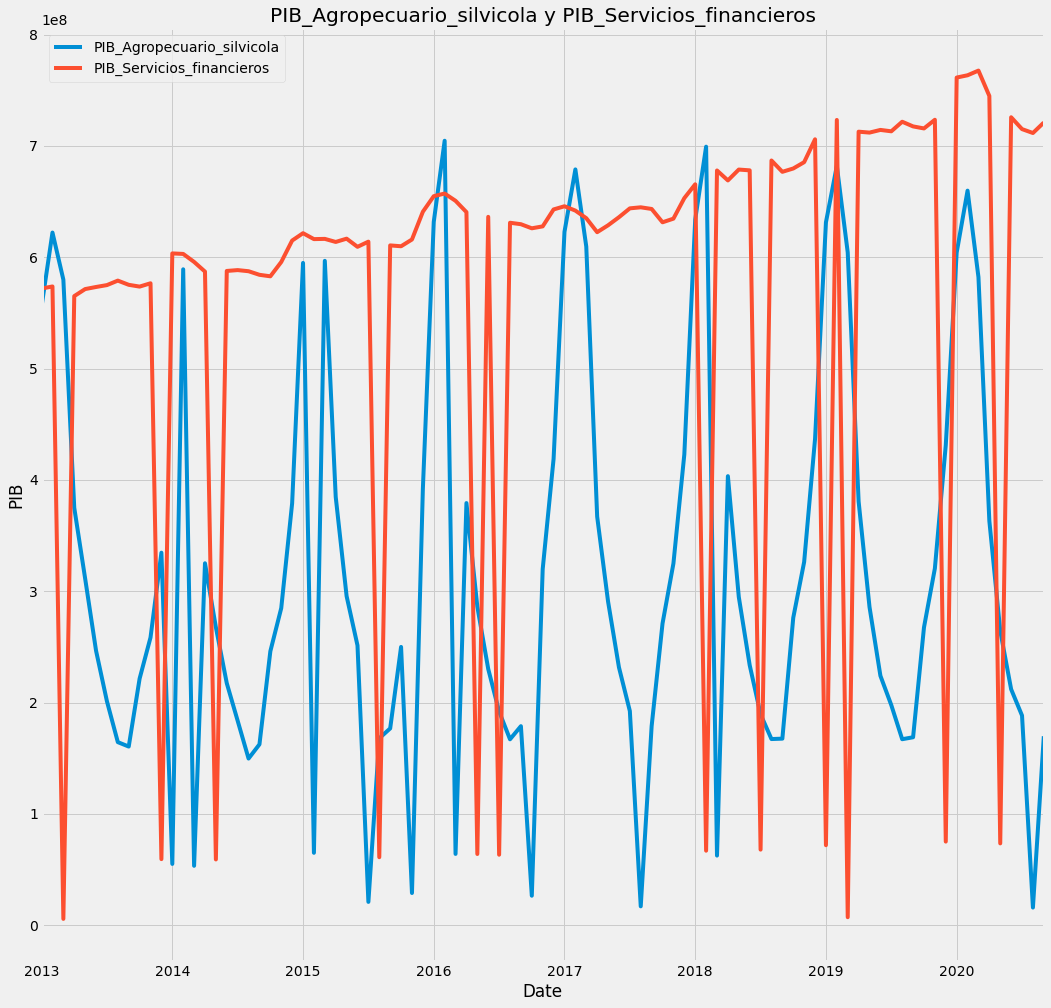

In [91]:
def get_most_recent_date(df, date_name):
    df_parsed = parse_dates(df, date_name)

    return df_parsed[date_name].max()

initial_date = pd.to_datetime("2013-01-01")
final_date = get_most_recent_date(banco_central, 'Periodo')

plot_PIB_time_series(banco_central, "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", initial_date, final_date)

# Resupuestas

1. Para el PIB_agropecuario_silvicola se puede apreciar una clara estacionalidad de la serie de tiempo, siendo los puntos mas bajos entre el segundo y cuarto trimestre cada año, y los puntos altos en el primero y el cuarto.
2. Para el PIB_servicios_financieros se asocia una clara tendencia creciente

Por otro lado, las series de tiempo parecen tener una correlación negativa, aunque esto quedaría mas claro en un scatter plot


# 4. Tratamiento y creación de variables

# 4.1 La correlación entre dos series de tiempo se puede medir efectivamente midiendo la correlación entre las variaciones porcentuales (por ejemplo, retornos, en el caso de finanzas) de las series de tiempo que se están evaluando.

In [92]:
precio_leche = pd.read_csv("precio_leche.csv")

In [93]:
precio_leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [94]:
print(precio_leche.Mes.unique())
print(precio_leche.Anio.unique())


['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov' 'Dic']
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021]


In [95]:
# standarize months in precio_leche

def prepare_precio_leche(df):
    precio_leche = df.copy()
    months = ['Ene' ,'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    dict_months = dict(zip(months, range(1, len(months)+1)))

    precio_leche['Mes'] = precio_leche['Mes'].apply(lambda month_name: dict_months[month_name])

    return precio_leche

df_leche = prepare_precio_leche(precio_leche)

df_leche.head()

,Anio,Mes,Precio_leche
0,1979,1,3.85
1,1979,2,4.58
2,1979,3,5.18
3,1979,4,6.06
4,1979,5,7.25


In [96]:
# create year, month and trimester variables

def generate_time_features(df):
    banco_df = df.copy()
    banco_df = parse_dates(banco_df, 'Periodo')

    banco_df['year'] = pd.to_numeric(banco_df['Periodo'].dt.year, errors='coerce', downcast='integer')
    banco_df['month'] = pd.to_numeric(banco_df['Periodo'].dt.month, errors='coerce', downcast='integer')
    banco_df['trimester'] = banco_df['Periodo'].dt.quarter

    return banco_df

df_banco = generate_time_features(banco_central)

df_banco[['Periodo', 'year', 'month', 'trimester']].head()

,Periodo,year,month,trimester
0,2013-03-01,2013.0,3.0,1.0
1,2013-04-01,2013.0,4.0,2.0
2,2013-05-01,2013.0,5.0,2.0
3,2013-06-01,2013.0,6.0,2.0
4,2013-07-01,2013.0,7.0,3.0


In [97]:
# merge banco_central, precio_leche y precipitaciones

precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


### Merge

In [98]:
print(precipitaciones.shape)
print(banco_central.shape)

(496, 9)
(612, 85)


In [99]:
df_precipitations =  parse_dates(precipitaciones, 'date')

In [100]:
df_banco

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester
0,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0,2013.0,3.0,1.0
1,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0,2013.0,4.0,2.0
2,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0,2013.0,5.0,2.0
3,2013-06-01,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0,2013.0,6.0,2.0
4,2013-07-01,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0,2013.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN,2008.0,8.0,3.0
610,2008-09-01,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN,2008.0,9.0,3.0
611,2008-10-01,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN,2008.0,10.0,4.0
612,2008-11-01,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN,2008.0,11.0,4.0


In [101]:
df_model = pd.merge(df_precipitations, df_banco, left_on='date', right_on='Periodo', how='inner')

In [102]:
print(df_model.shape)
df_model.head()

(496, 97)


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,2.0,1.0
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998-10-01,...,NaN,689.318.173,NaN,NaN,NaN,NaN,NaN,1998.0,10.0,4.0
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001-02-01,...,NaN,633.960.917,307.995.553,NaN,NaN,NaN,NaN,2001.0,2.0,1.0
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008-11-01,...,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN,2008.0,11.0,4.0
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009-04-01,...,NaN,880.222.361,456.792.002,NaN,NaN,NaN,11991.0,2009.0,4.0,2.0


In [103]:
# merge con precios_leche

df_model = pd.merge(df_model, df_leche, left_on=["year", "month"], right_on=["Anio", "Mes"], how="inner")

In [104]:
df_model.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,...,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester,Anio,Mes,Precio_leche
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989-02-01,...,NaN,NaN,NaN,NaN,1989.0,2.0,1.0,1989,2,46.38
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998-10-01,...,NaN,NaN,NaN,NaN,1998.0,10.0,4.0,1998,10,91.77
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001-02-01,...,NaN,NaN,NaN,NaN,2001.0,2.0,1.0,2001,2,114.30
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008-11-01,...,NaN,NaN,NaN,NaN,2008.0,11.0,4.0,2008,11,187.49
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009-04-01,...,NaN,NaN,NaN,11991.0,2009.0,4.0,2.0,2009,4,150.91


### 4.3 Juntar preparación df, limpieza, creación de variables y merge

In [370]:
def generate_lags(df, lower_lag, upper_lag):
    df_model = df.copy()
    lags_features = []

    for num_lag in range(lower_lag, upper_lag):
        feature_name = f'lag_leche_{num_lag}'
        df_model[feature_name] = df_model['Precio_leche'].shift(num_lag)

        lags_features.append(feature_name)
    return df_model

def prepare_df(df_precipitaciones_mm, df_bank, df_milk):

    # make copies of df in order to not change the input
    df_precipitaciones = df_precipitaciones_mm.copy()
    df_banco_central = df_bank.copy()
    df_precio_leche = df_milk.copy()

    # drop duplicates
    df_precipitaciones = remove_duplicates(df_precipitaciones)
    df_banco_central = remove_duplicates(df_banco_central)

    # parse dates
    df_precipitaciones = parse_dates(df_precipitaciones, 'date')
    df_banco_central = parse_dates(df_banco_central, 'Periodo')

    # prepare banco_central
    object_cols_banco_central = df_banco_central.select_dtypes(object)
    object_columns = list(object_cols_banco_central.columns)

    imacec_columns = [imacec_word for imacec_word in df_banco_central.columns if "Imacec" in imacec_word]
    column_to_clean_general = list(set(object_columns).difference(imacec_columns))

    df_banco_central = transform_object_columns_into_numeric(df_banco_central, object_columns)

    # prepare precio_leche
    df_precio_leche = prepare_precio_leche(df_precio_leche)

    # generate time features banco_central
    df_banco_central = generate_time_features(df_banco_central)

    # clean columns with z-score (pendiente)
    # remove_columns_banco = ['Periodo', 'year', 'month', 'trimestre']
    # df_banco_central = remove_outliers_df(df_banco_central, remove_columns_banco)

    # remove_columns_precipitations = ['date']
    # df_precipitaciones = remove_outliers_df(df_precipitaciones, remove_columns_precipitations)

    # remove_columns_milk = ['Anio', 'Mes']
    # df_precio_leche = remove_outliers_df(df_precio_leche, remove_columns_milk)

    # clean IMACEC columns
    df_banco_central = clean_imacec(df_banco_central)
    df_banco_central.drop('Periodo', axis=1, inplace=True)
    df_banco_central.reset_index(drop=False, inplace=True)

    # # merge
    df_model = pd.merge(df_precipitaciones, df_banco_central, left_on='date', right_on='Periodo', how='inner')
    df_model = pd.merge(df_model, df_precio_leche, left_on=["year", "month"], right_on=["Anio", "Mes"], how="inner")

    # generate lags y estadísticos acumulados 
    df_model = generate_lags(df_model, 1, 12)


    return df_model


In [371]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco_central = pd.read_csv("banco_central.csv")
precio_leche = pd.read_csv("precio_leche.csv")


df_model = prepare_df(precipitaciones, banco_central, precio_leche)

In [373]:
lags_features = [
 'lag_leche_1',
 'lag_leche_2',
 'lag_leche_3',
 'lag_leche_4',
 'lag_leche_5',
 'lag_leche_6',
 'lag_leche_7',
 'lag_leche_8',
 'lag_leche_9',
 'lag_leche_10',
 'lag_leche_11'
 ]

# 5. Modelo

In [374]:
df_model['Precio_leche'].isna().sum()

0

In [375]:
df_model.sort_values(['date'], inplace=True)

df_model.index = df_model['date']

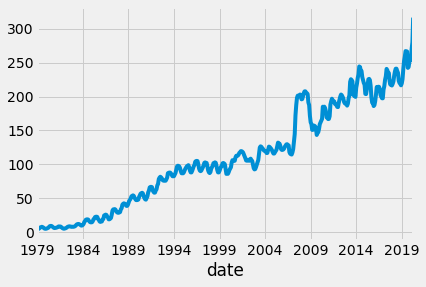

In [376]:
df_model['Precio_leche'].plot()

In [377]:
# correlations



In [378]:

corr_matrix = df_model.corr()

In [379]:
corr_precio_leche = corr_matrix['Precio_leche'].sort_values(ascending=False)
name_variables = corr_precio_leche.index
corr_percentage = corr_precio_leche.values

for name_variable, corr_value in zip(name_variables, corr_percentage):
    print(name_variable, corr_value)

Precio_leche 1.0
year 0.9758045100569716
Anio 0.9758045100569716
Imacec_servicios 0.9364606376717063
Imacec_no_minero 0.9311839096710454
Imacec_empalmado 0.9270041405446905
Imacec_a_costo_de_factores 0.9262141191011454
Imacec_industria 0.897660217054719
Imacec_comercio 0.8969253928300652
Imacec_produccion_de_bienes 0.8429564134897912
Precio_de_la_onza_troy_de_oro_dolaresoz 0.808329321128629
Precio_del_cobre_refinado_BML_dolareslibra 0.7943091230867871
Imacec_resto_de_bienes 0.7862888123185839
Precio_del_petroleo_WTI_dolaresbarril 0.7300545993011964
Precio_de_la_onza_troy_de_plata_dolaresoz 0.718895911548504
Precio_de_la_gasolina_en_EEUU_dolaresm3 0.713203492010325
Imacec_minero 0.5530314998094324
Precio_del_petroleo_Brent_dolaresbarril 0.5333723325986346
Ventas_autos_nuevos 0.40250388513350915
Precio_del_kerosene_dolaresm3 0.3814699164824759
Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100 0.34393963216566825
PIB_Comunicaciones 0.3021878824546462
Ocupacion_en_Actividades_de_atenci

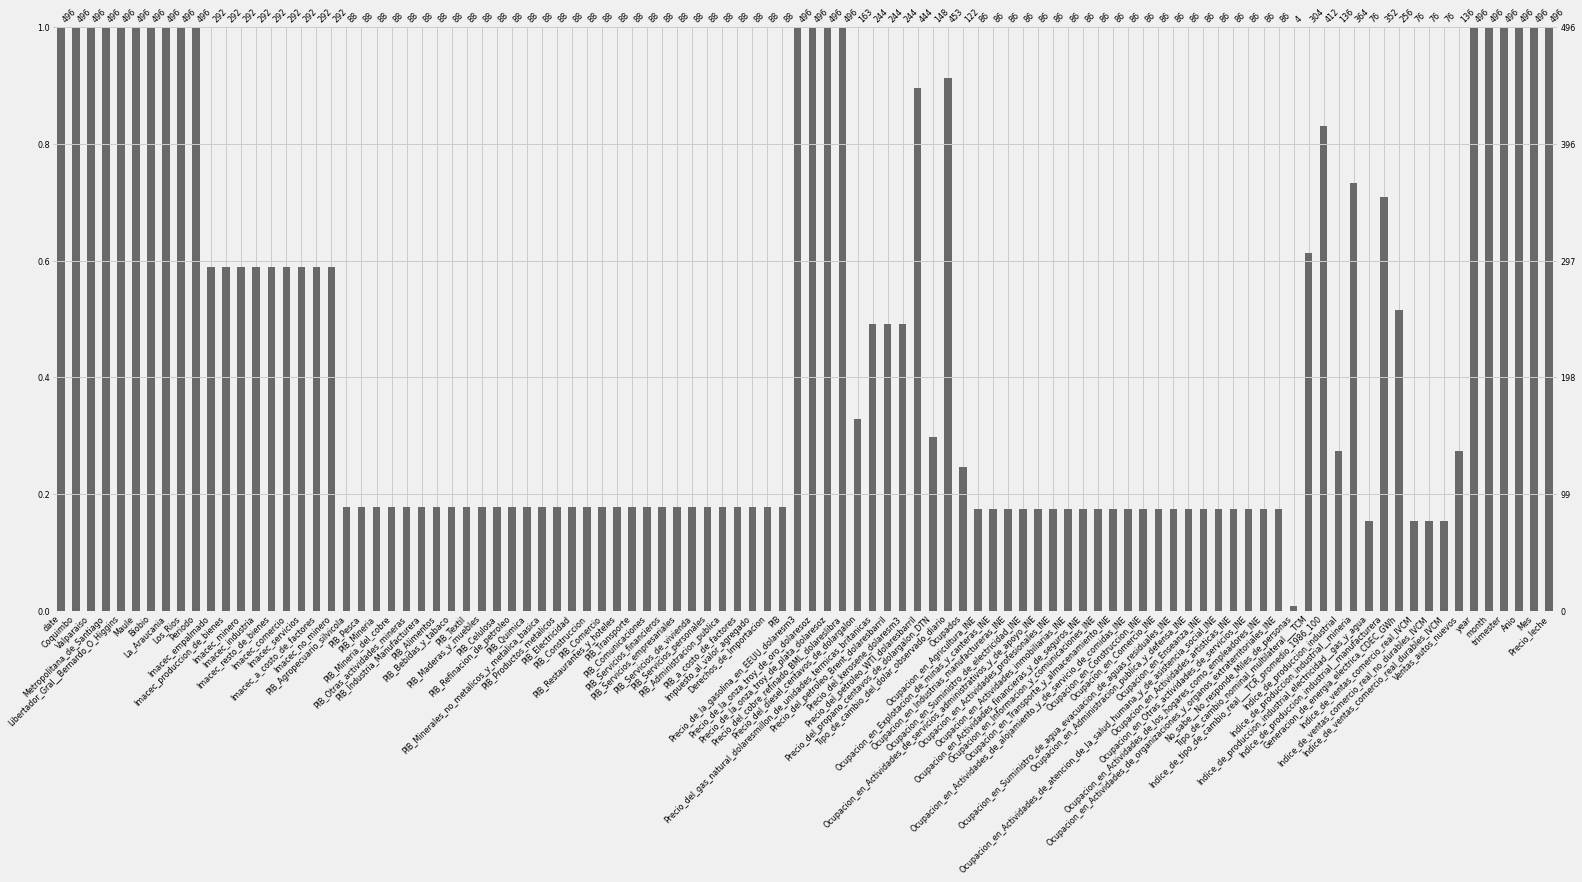

In [310]:
import missingno as msno

msno.bar(df_model, labels=True, fontsize=8)

In [311]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

import xgboost

from sklearn.ensemble import VotingRegressor

### we will work first with the most highly correlated variables with the milk price target variable for a first model, although there can be nonlinear correlations that are not captured by Pearson's correlation index. It's also important to say that there are a lot of possible new features that can be added by mixing some of the variables

In [333]:
features_names = corr_precio_leche = corr_matrix['Precio_leche'].sort_values(ascending=False)
name_variables = corr_precio_leche.index
corr_percentage = corr_precio_leche.values

features_names_model = []
for name_variable, corr_value in zip(name_variables, corr_percentage):
    if corr_value>0.5:
        features_names_model.append(name_variable)

print(features_names_model)

['Precio_leche', 'Anio', 'year', 'Imacec_servicios', 'Imacec_no_minero', 'Imacec_empalmado', 'Imacec_a_costo_de_factores', 'Imacec_industria', 'Imacec_comercio', 'Imacec_produccion_de_bienes', 'Precio_de_la_onza_troy_de_oro_dolaresoz', 'Precio_del_cobre_refinado_BML_dolareslibra', 'Imacec_resto_de_bienes', 'Precio_del_petroleo_WTI_dolaresbarril', 'Precio_de_la_onza_troy_de_plata_dolaresoz', 'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Imacec_minero', 'Precio_del_petroleo_Brent_dolaresbarril']


In [334]:
precipitaciones.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

In [380]:
# modelo básico

lags_features = [
 'lag_leche_1',
 'lag_leche_2',
 'lag_leche_3',
 'lag_leche_4',
 'lag_leche_5',
 'lag_leche_6',
 'lag_leche_7',
 'lag_leche_8',
 'lag_leche_9',
 'lag_leche_10',
 'lag_leche_11'
 ]

features_model_names = ['Precio_leche', 'year', 'month', 'trimester', 'Imacec_servicios', 'Imacec_no_minero', 'Imacec_empalmado', 'Imacec_a_costo_de_factores', 'Imacec_industria', 'Imacec_comercio', 
'Imacec_produccion_de_bienes', 'Precio_de_la_onza_troy_de_oro_dolaresoz', 'Precio_del_cobre_refinado_BML_dolareslibra', 'Imacec_resto_de_bienes', 'Precio_del_petroleo_WTI_dolaresbarril', 
'Precio_de_la_onza_troy_de_plata_dolaresoz', 'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Imacec_minero', 'Precio_del_petroleo_Brent_dolaresbarril', 'Coquimbo', 'Valparaiso', 
'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania', 'Los_Rios'] + lags_features

label_name = ['Precio_leche']



In [382]:
print(df_model.shape)
df_model.isna().sum()

(496, 111)


date                                    0
Coquimbo                                0
Valparaiso                              0
Metropolitana_de_Santiago               0
Libertador_Gral__Bernardo_O_Higgins     0
                                       ..
lag_leche_7                             7
lag_leche_8                             8
lag_leche_9                             9
lag_leche_10                           10
lag_leche_11                           11
Length: 111, dtype: int64

In [383]:
df_model[~df_model['Precio_del_petroleo_Brent_dolaresbarril'].isna()].year.unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])

In [384]:
df_model.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios', 'Periodo',
       ...
       'lag_leche_2', 'lag_leche_3', 'lag_leche_4', 'lag_leche_5',
       'lag_leche_6', 'lag_leche_7', 'lag_leche_8', 'lag_leche_9',
       'lag_leche_10', 'lag_leche_11'],
      dtype='object', length=111)

## keeping only non nan values for first model

In [385]:
df_model_restricted = df_model[features_model_names].copy()
df_model_not_nan = df_model_restricted.dropna(how='any')


In [386]:
print(df_model_restricted.shape)
print(df_model_not_nan.shape)

(496, 38)
(236, 38)


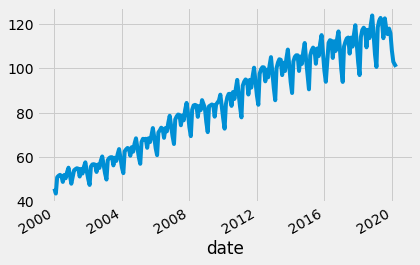

In [387]:
df_model_not_nan['Imacec_servicios'].plot()

## 5.2 Considerando que es importante que el conjunto de test tenga una distribución parecida al conjunto de entrenamiento, se escogerá un test set que cumpla estos requerimientos y que además será aproximadamente un 10% del dataset completo, dada la cantidad de datos. En este caso, dado el comportamiento estacional de la serie de la leche, es importante elegir un test set donde cada una de estas se encuentre representada (aumenta entre Enero a Julio, y luego disminuye por los últimos dos trimestres)


In [388]:
df_model_not_nan['year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])

In [389]:
years_test_set = [2018, 2019, 2020]
years_train_set = [2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
                    2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016, 2017]
test_set = df_model_not_nan.loc[df_model_not_nan.year.isin(years_test_set)]
train_set = df_model_not_nan.loc[df_model_not_nan.year.isin(years_train_set)]

print("test: ", 100*len(test_set)/len(df_model_not_nan))
print("train: ", 100*len(train_set)/len(df_model_not_nan))


test:  11.440677966101696
train:  88.55932203389831


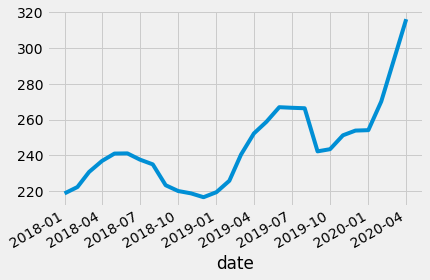

In [390]:
test_set['Precio_leche'].plot()

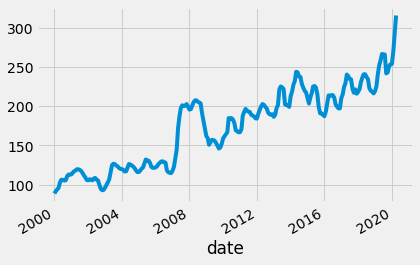

In [391]:
df_model_not_nan['Precio_leche'].plot()

In [392]:
df_model_not_nan.reset_index(drop=True, inplace=True)

df_model_not_nan.columns

Index(['Precio_leche', 'year', 'month', 'trimester', 'Imacec_servicios',
       'Imacec_no_minero', 'Imacec_empalmado', 'Imacec_a_costo_de_factores',
       'Imacec_industria', 'Imacec_comercio', 'Imacec_produccion_de_bienes',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra', 'Imacec_resto_de_bienes',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Imacec_minero',
       'Precio_del_petroleo_Brent_dolaresbarril', 'Coquimbo', 'Valparaiso',
       'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins',
       'Maule', 'Biobio', 'La_Araucania', 'Los_Rios', 'lag_leche_1',
       'lag_leche_2', 'lag_leche_3', 'lag_leche_4', 'lag_leche_5',
       'lag_leche_6', 'lag_leche_7', 'lag_leche_8', 'lag_leche_9',
       'lag_leche_10', 'lag_leche_11'],
      dtype='object')

In [393]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


num_features = ['year', 'Imacec_servicios',
       'Imacec_no_minero', 'Imacec_empalmado', 'Imacec_a_costo_de_factores',
       'Imacec_industria', 'Imacec_comercio', 'Imacec_produccion_de_bienes',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra', 'Imacec_resto_de_bienes',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Imacec_minero',
       'Precio_del_petroleo_Brent_dolaresbarril',
       'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania', 'Los_Rios'] + lags_features

cat_features = ['month', 'trimester']

label_name = ['Precio_leche']

# train set
X_train = train_set.drop(['Precio_leche'], axis=1).copy()
y_train = train_set[label_name].copy()

# test set
X_test = test_set.drop(['Precio_leche'], axis=1).copy()
y_test = test_set[label_name].copy()

# pipeline for numerical data
num_features_pipeline = Pipeline([
    ('standard_scaler', StandardScaler())
])


# pipeline
preparation_pipeline = ColumnTransformer([
    ("numerical", num_features_pipeline, num_features),
    ("categorical", OneHotEncoder(), cat_features)
])



In [394]:
X_train_prepared = preparation_pipeline.fit_transform(X_train)

# model
model = Ridge()

alpha =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params_cv = dict(alpha=alpha)

grid_search = GridSearchCV(model, params_cv, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train_prepared, y_train)
model = grid_search.best_estimator_


# model.fit(X_train_prepared, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


In [395]:
model_name = "Ridge"

# Error in the training set
model_pred = model.predict(X_train_prepared)
model_mse = mean_squared_error(y_train, model_pred)
model_rmse = np.sqrt(model_mse)
print(f"RMSE in training set for model {model_name}:", model_rmse, "\n")


RMSE in training set for model Ridge: 9.775028215355826 



In [396]:
# Evaluation in test set

print("test columns", X_test.columns)

X_test_prepared = preparation_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"RMSE in test set for model {model_name}:", final_rmse, "\n")


test columns Index(['year', 'month', 'trimester', 'Imacec_servicios', 'Imacec_no_minero',
       'Imacec_empalmado', 'Imacec_a_costo_de_factores', 'Imacec_industria',
       'Imacec_comercio', 'Imacec_produccion_de_bienes',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra', 'Imacec_resto_de_bienes',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3', 'Imacec_minero',
       'Precio_del_petroleo_Brent_dolaresbarril', 'Coquimbo', 'Valparaiso',
       'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins',
       'Maule', 'Biobio', 'La_Araucania', 'Los_Rios', 'lag_leche_1',
       'lag_leche_2', 'lag_leche_3', 'lag_leche_4', 'lag_leche_5',
       'lag_leche_6', 'lag_leche_7', 'lag_leche_8', 'lag_leche_9',
       'lag_leche_10', 'lag_leche_11'],
      dtype='object')
RMSE in test set for model Ridge: 40.78976334393771 



In [397]:
y_train_analysis = y_train.copy()
y_train_analysis['predictions'] = model_pred

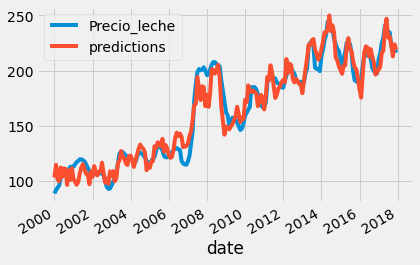

In [398]:
y_train_analysis.plot()

In [399]:
y_test_analysis = y_test.copy()
y_test_analysis['predictions'] = final_predictions
y_test_analysis.head()

,Precio_leche,predictions
date,,
2018-01-01,218.68,218.393079
2018-02-01,222.25,203.246664
2018-03-01,230.70,220.790574
2018-04-01,236.85,239.615681
2018-05-01,240.99,252.403955


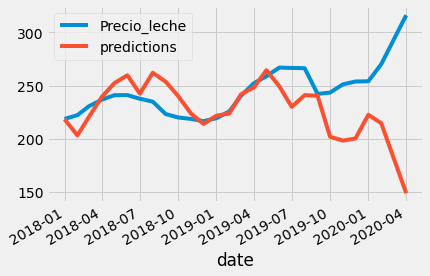

In [400]:
y_test_analysis.plot()